### Phys 453: Quantum Mechanics - Plotting Eigenstates of the Simple Harmonic Oscillator

The Simple Harmonic Oscillator (SHO) is one of the most important systems in quantum mechanics for the following reasons:
1. It can solved analytically
* A harmonic potential can be used to approximate many other, more complex potentials
* It is the foundation for more advanced physics, from understanding phonons in materials to quantum field theory

For Griffiths, we know that the time independent, normalized stationary states for the SHO are given in terms of Hermite polynomials, $H_n(\xi)$, by

$$ \psi_n(x) = \left( \frac{m\omega}{\pi \hbar}\right)^{1/4}\frac{1}{\sqrt{2^nn!}}H_n(\xi)e^{-\xi^2/2}$$
$$ \xi = \sqrt{\frac{m\omega}{\hbar}}x$$

In this notebook we are going to write some code to obtain and plot the SHO energy eigenstates. And by 'obtain', we really just mean writing down the above analytic solutions in Python.  The goals are:
1. Be able to write down the time independent eigenstate wavefunctions, $\psi_n(x)$, in Python (which requires understanding how to get Hermite polynomials from Numpy).
* Plot the wavefunctions in a grid format.
* Compare the behavior of a quantum harmonic oscillator to a classical harmonic oscillator. Connect what happens as you increase 'n' to the transition from quantum to classical behavior.

In order to compare with the behavior of a classical harmonic oscillator, you should consult Professor Berman's Quantum Mechanics notes, section 7.1.  There it is shown that for a classical harmonic oscillator with energy $E$, the classical probability of finding the particle at $x$ is given by

$$ P_{classical}(x)= \frac{1}{\pi \sqrt{x_{max}^2-x^2}} $$
$$ x_{max} = \sqrt{\frac{2E}{m\omega^2}}$$
Where $x_{max}$ is the classical turning point, and $P_{classical}(x)$ is understood to be zero for $|x|>|x_{max}|$.


#### Load Requirements and Define Parameters
These are all the libraries you should need for the rest of the notebook.

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt 
import numpy
import numpy.polynomial.hermite as Herm
import math

And here are the parameters we'll use and the space to plot the wavefunctions in.

In [2]:
#Choose simple units
m=1.
w=1.
hbar=1.

#Discretized space
dx = 0.05
x_lim = 12
x = numpy.arange(-x_lim,x_lim,dx)

#### Question 1: Hermite Polynomials

Probably the hardest part of this notebook is understanding how to get Hermite polynomials in Python.  You should read the documention for the [numpy.polynomial.hermite.hermval](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.polynomial.hermite.hermval.html) function.  Finish the following function, `hermite(x,n)`, so that it returns $H_n(\xi)$ for the SHO.  Remember that $\xi$ is a function of $x$!  (Since we set $m=\omega=\hbar=1$, $\xi$ is a trivial function of $x$, but you should still program the full thing in case we want to change the values later.)

In [11]:
def hermite(x, n):
    xi = numpy.sqrt(m*w/hbar)*x
    
    #Calculate H_n(xi) and return it
    
    return

The following codes uses your function to plot the first 5 Hermite polynomials.  Do a google seach for Hermite polynomials to make sure that the results look right.

In [12]:
plt.figure()
plt.plot(x, hermite(x,0), linewidth=2,label=r"$H_0$")
plt.plot(x, hermite(x,1), linewidth=2,label=r"$H_1$")
plt.plot(x, hermite(x,2), linewidth=2,label=r"$H_2$")
plt.plot(x, hermite(x,3), linewidth=2,label=r"$H_3$")
plt.plot(x, hermite(x,4), linewidth=2,label=r"$H_4$")

#Set limits for axes
plt.xlim([-2.5,2.5])
plt.ylim([-20,20])

#Set axes labels
plt.xlabel("x")
plt.ylabel(r"$H_n(\xi)$")
plt.title(r"Hermite Polynomials, $H_n(\xi)$")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

ValueError: x and y must not be None

#### Question 2: Building $\psi_n(x)$

Finish this function, `stationary_state(x,n)`, so that it returns $\psi_n(x)$. Look at the test plot of $\psi_4(x)$ to check your code. 

<IPython.core.display.Javascript object>


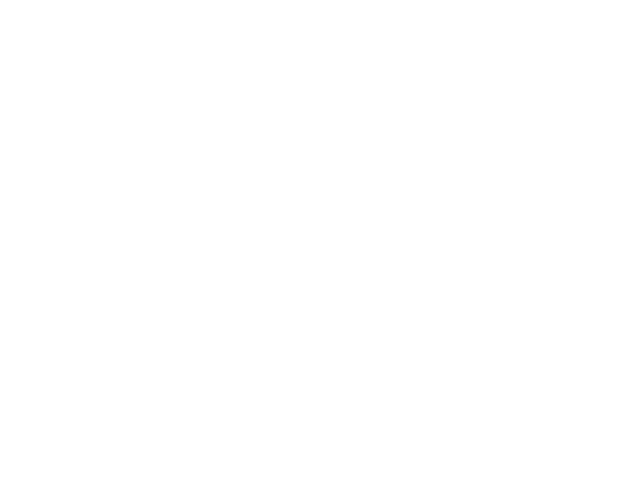

NameError: name 'psi' is not defined

In [10]:
def stationary_state(x,n):
    xi = numpy.sqrt(m*w/hbar)*x
    
    #Calculate psi
    
    return psi

plt.figure()
plt.plot(x, stationary_state(x,4))
plt.xlabel(r"x")
plt.ylabel(r"$\psi_4(x)$")
plt.title(r"Test Plot of $\psi_4(x)$")
plt.show()

#### Question 3: Classical Probability Density, $P_{classical}(x)$
Now finish the function `classical_P(x,n)` so that given $x$ and $n$, it returns the classical probability density for a particle with an energy equal to that of the $n^{th}$ quantum harmonic oscillator energy level.  Remember that $P_{classical}(x)$ should be zero for $|x|>x_{max}$! You may want to actually set $P_{classical}(x)=0$ for $|x| > x_{max} - \delta x$, since $P_{classical}(x)$ blows up to infinity as $|x|$ approaches $x_{max}$.

<IPython.core.display.Javascript object>


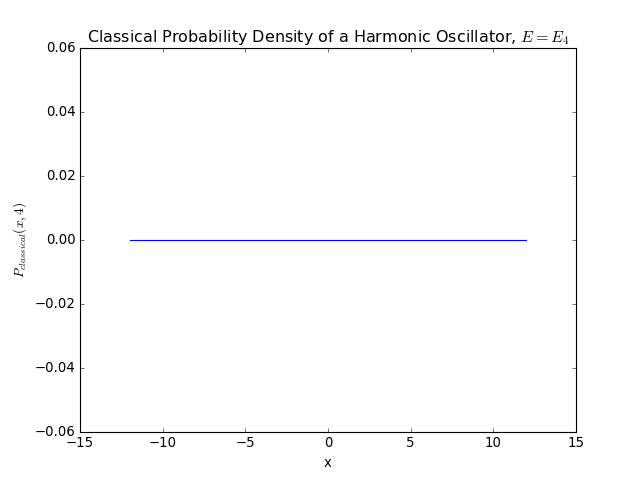

In [9]:
def classical_P(x,n):
    E = hbar*w*(n+0.5)
    x_max = numpy.sqrt(2*E/(m*w**2))
    classical_prob = numpy.zeros(x.shape[0])
    
    #Now write some code to fill in classical_prob
    
    
    return classical_prob

plt.figure()
plt.plot(x, classical_P(x,4))
plt.xlabel(r"x")
plt.ylabel(r"$P_{classical}(x,4)$")
plt.title(r"Classical Probability Density of a Harmonic Oscillator, $E=E_4$")
plt.show()

#### Question 4: Plot $|\psi_n(x)|^2$

Use the [subplot](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) command from [`matplotlib`](http://matplotlib.org/) to create a 3 by 2 grid of plots, with one plot each for the probability densities for stationary states $n=0,3,8,15,25,40$.  I did the $n=0$ one for you.

<IPython.core.display.Javascript object>


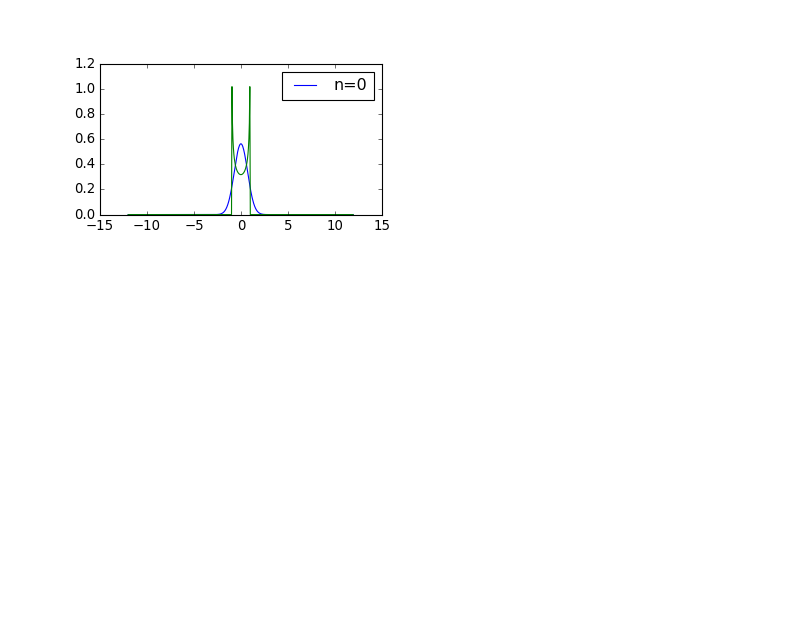

In [8]:
plt.figure(figsize=(10, 8))
plt.subplot(3,2,1)
plt.plot(x, numpy.conjugate(stationary_state(x,0))*stationary_state(x,0), label="n=0")
plt.plot(x, classical_P(x,0))
plt.legend()

plt.show()

#### Question 5: Comparison of the Classical and Quantum Harmonic Oscillators
We know that quantum physics often makes counter-intuitive predictions that contradict classical physics.  But we also know that quantum effects do not often appear in the macroscopic world. For the example of the harmonic oscillator, at which energies do classical and quantum physics most agree, and at which energies do they most strongly diverge?  Based on the above graphs, describe some of the differences predicted by quantum and classical physics for the harmonic oscillator.